In [1]:
!pip install numpy
!pip install pandas
# !pip install scipy
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install plotly-express
#!pip install sklearn.preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
from re import I


data = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')

In [3]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,"April 29, 2023","April 29, 2023",Run,633,4.99926,3048,10.15710,0.485283,5.90719,123.6390,164.0,7980.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/7241026975
1,"April 28, 2023","April 28, 2023",Run,420,3.14518,1816,9.62092,5.464380,6.23641,10.9802,0.0,4754.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/7240171036
2,"April 27, 2023","April 27, 2023",Run,346,2.51770,1531,10.13290,3.935460,5.92131,15.2460,173.0,3965.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/7238295151
3,"April 22, 2023","April 22, 2023",Run,520,4.00120,2428,10.10590,0.032558,5.93713,1842.8800,163.0,6301.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/7227601555
4,"April 18, 2023","April 18, 2023",Run,478,3.64646,2587,11.82130,1.060580,5.07559,56.5730,152.0,5918.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/7220801794


In [4]:
data.shape

(808, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          808 non-null    object 
 1   Workout Date            808 non-null    object 
 2   Activity Type           808 non-null    object 
 3   Calories Burned (kCal)  808 non-null    int64  
 4   Distance (mi)           808 non-null    float64
 5   Workout Time (seconds)  808 non-null    int64  
 6   Avg Pace (min/mi)       808 non-null    float64
 7   Max Pace (min/mi)       808 non-null    float64
 8   Avg Speed (mi/h)        808 non-null    float64
 9   Max Speed (mi/h)        808 non-null    float64
 10  Avg Heart Rate          551 non-null    float64
 11  Steps                   785 non-null    float64
 12  Notes                   808 non-null    object 
 13  Source                  808 non-null    object 
 14  Link                    808 non-null    ob

In [6]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(data['Distance (mi)'])
data['target'] = labels
data.drop(columns=['Link', 'Source', 'Notes', 'Max Pace (min/mi)', 'Max Speed (mi/h)'], inplace=True)

In [7]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
0,"April 29, 2023","April 29, 2023",Run,633,4.99926,3048,10.15710,5.90719,164.0,7980.0,497
1,"April 28, 2023","April 28, 2023",Run,420,3.14518,1816,9.62092,6.23641,0.0,4754.0,349
2,"April 27, 2023","April 27, 2023",Run,346,2.51770,1531,10.13290,5.92131,173.0,3965.0,210
3,"April 22, 2023","April 22, 2023",Run,520,4.00120,2428,10.10590,5.93713,163.0,6301.0,432
4,"April 18, 2023","April 18, 2023",Run,478,3.64646,2587,11.82130,5.07559,152.0,5918.0,413


In [8]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Avg Speed (mi/h)            0
Avg Heart Rate            257
Steps                      23
target                      0
dtype: int64

In [10]:
# data['Date Submitted'] = pd.to_datetime(data['Date Submitted'], format='%Y-%m-%d')
# data['Workout Date'] = pd.to_datetime(data['Workout Date'], format='%Y-%m-%d')

In [11]:
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
count,808.000000,808.000000,808.000000,808.000000,808.000000,551.000000,785.000000,808.000000
mean,416.336634,3.275789,2144.116337,11.343651,5.549886,113.789474,5298.737580,292.716584
std,267.514172,2.057685,1325.156165,6.617713,1.619955,59.662773,3332.884271,161.153702
min,9.000000,0.000000,95.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,261.750000,2.214265,1535.500000,9.146020,5.220275,107.000000,3708.000000,176.750000
50%,404.000000,3.100000,1809.000000,9.808040,6.067940,145.000000,4721.000000,281.000000
75%,461.000000,3.651130,2462.500000,10.975725,6.492135,154.000000,6017.000000,414.250000
max,1928.000000,13.481600,11065.000000,123.477000,14.863700,173.000000,23604.000000,599.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
d1 = data.sort_values(by='Avg Pace (min/mi)', ascending=False)
data.head(11)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
0,"April 29, 2023","April 29, 2023",Run,633,4.99926,3048,10.15710,5.90719,164.0,7980.0,497
1,"April 28, 2023","April 28, 2023",Run,420,3.14518,1816,9.62092,6.23641,0.0,4754.0,349
2,"April 27, 2023","April 27, 2023",Run,346,2.51770,1531,10.13290,5.92131,173.0,3965.0,210
3,"April 22, 2023","April 22, 2023",Run,520,4.00120,2428,10.10590,5.93713,163.0,6301.0,432
4,"April 18, 2023","April 18, 2023",Run,478,3.64646,2587,11.82130,5.07559,152.0,5918.0,413
5,"April 17, 2023","April 17, 2023",Run,418,3.10148,1890,10.15310,5.90953,164.0,4895.0,295
6,"April 10, 2023","April 10, 2023",Run,430,3.11541,2178,11.64570,5.15210,158.0,5044.0,342
7,"April 7, 2023","April 7, 2023",Run,414,3.10463,1902,10.20600,5.87891,165.0,4961.0,310
8,"April 2, 2023","April 2, 2023",Run,390,2.87110,3141,18.22640,3.29193,132.0,4864.0,238
9,"April 1, 2023","April 1, 2023",Run,434,3.10828,1908,10.22700,5.86684,170.0,4961.0,331


In [14]:
# data = data[data['Avg Pace (min/mi)'] < 20]
# data = data[data['Avg Pace (min/mi)'] > 0]
# data = data[data['Max Pace (min/mi)'] < 20]
# data = data[data['Max Pace (min/mi)'] > 0]
# data.head(11)
data['Avg Heart Rate'].fillna(data['Avg Heart Rate'].median(), inplace=True)
data.fillna(0, inplace=True)
# data.sort_values(by='Avg Pace (min/mi)', ascending=False)

#replace the extremely large values with the median
data.loc[data['Avg Pace (min/mi)'] > 20, 'Avg Pace (min/mi)'] = data['Avg Pace (min/mi)'].median()
#Use numpy instead of pandas to calculate the median
data['Avg Heart Rate'] = np.where(data['Avg Heart Rate'] < 30, data['Avg Heart Rate'].median(), data['Avg Heart Rate'])

<AxesSubplot:xlabel='Activity Type', ylabel='count'>

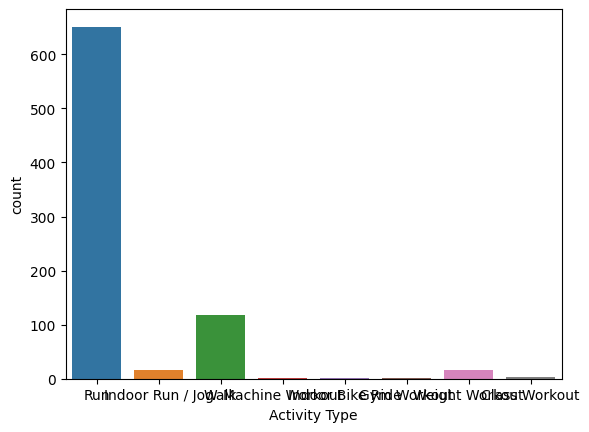

In [15]:
sns.countplot(x='Activity Type', data=data)

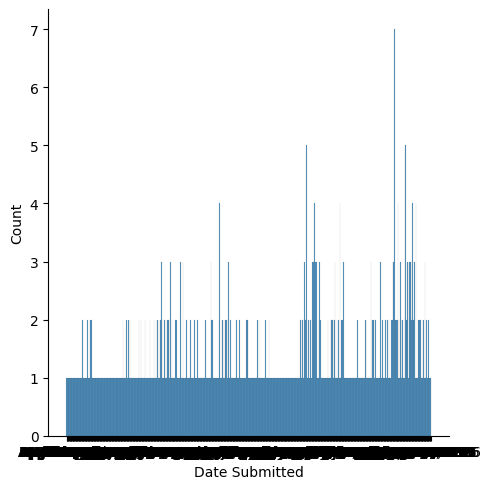

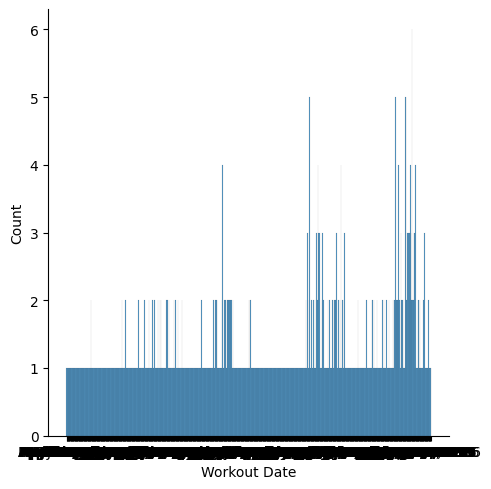

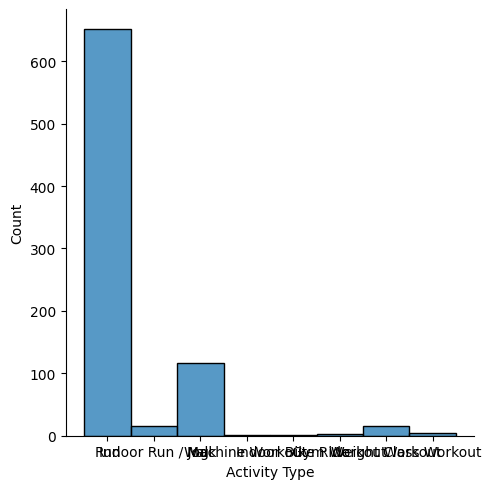

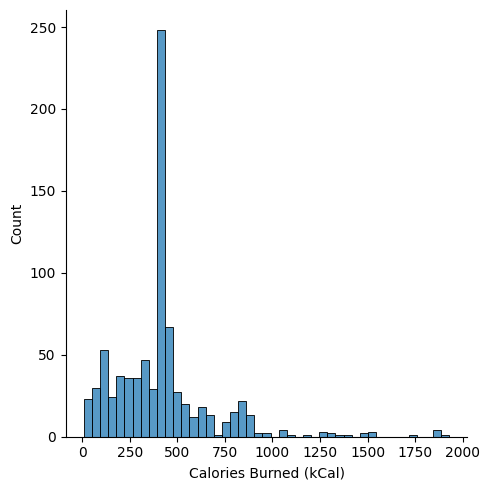

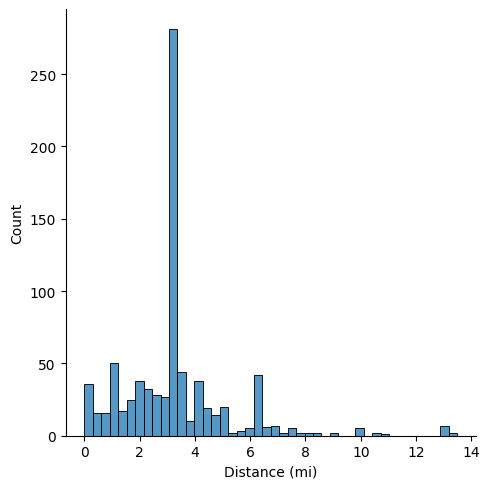

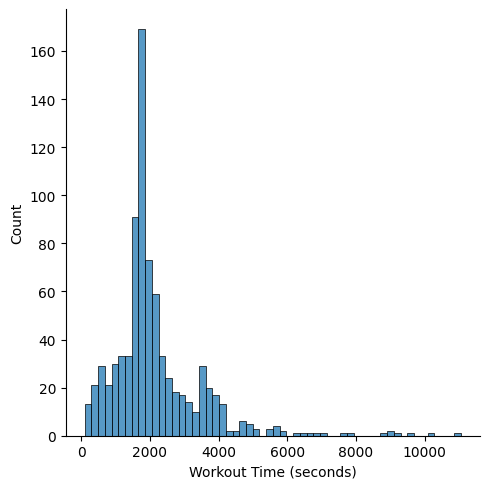

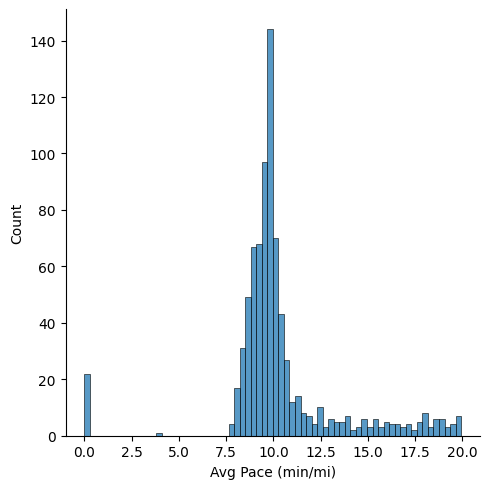

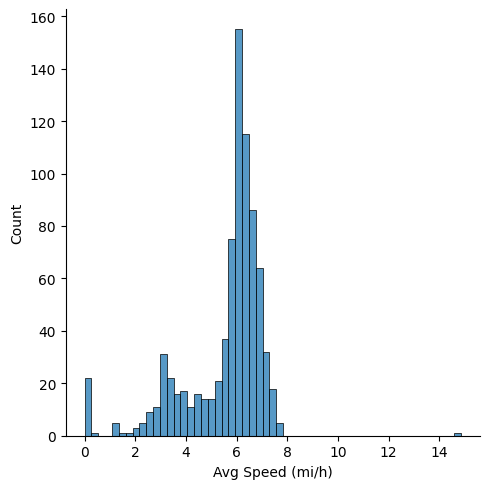

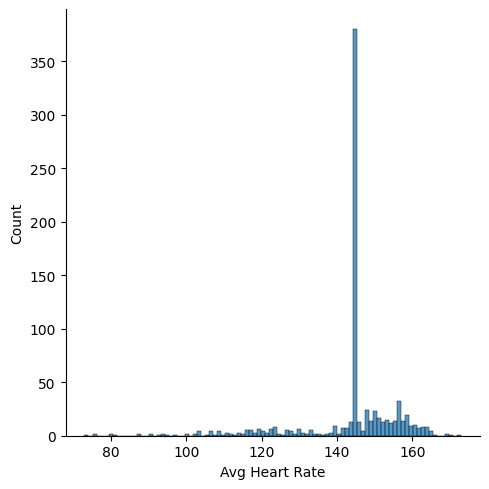

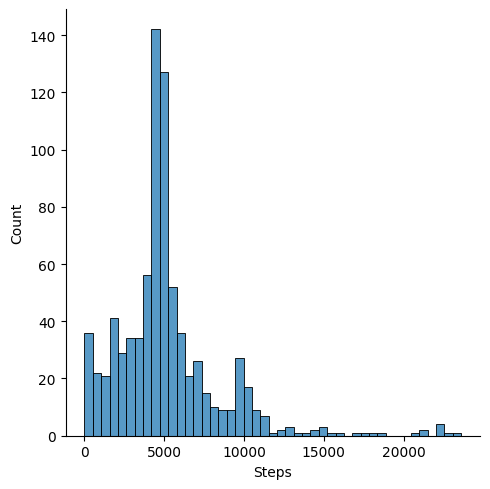

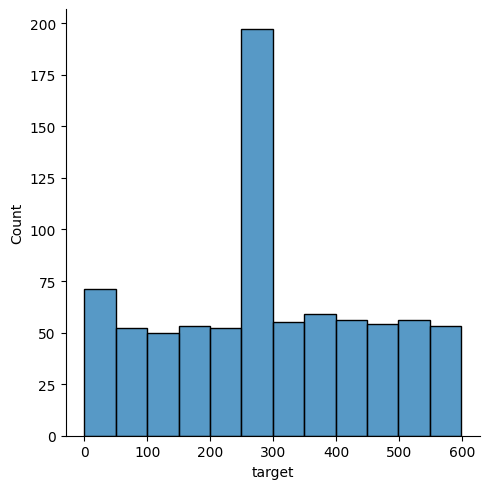

In [16]:
for column in data:
    sns.displot(x=column, data=data)

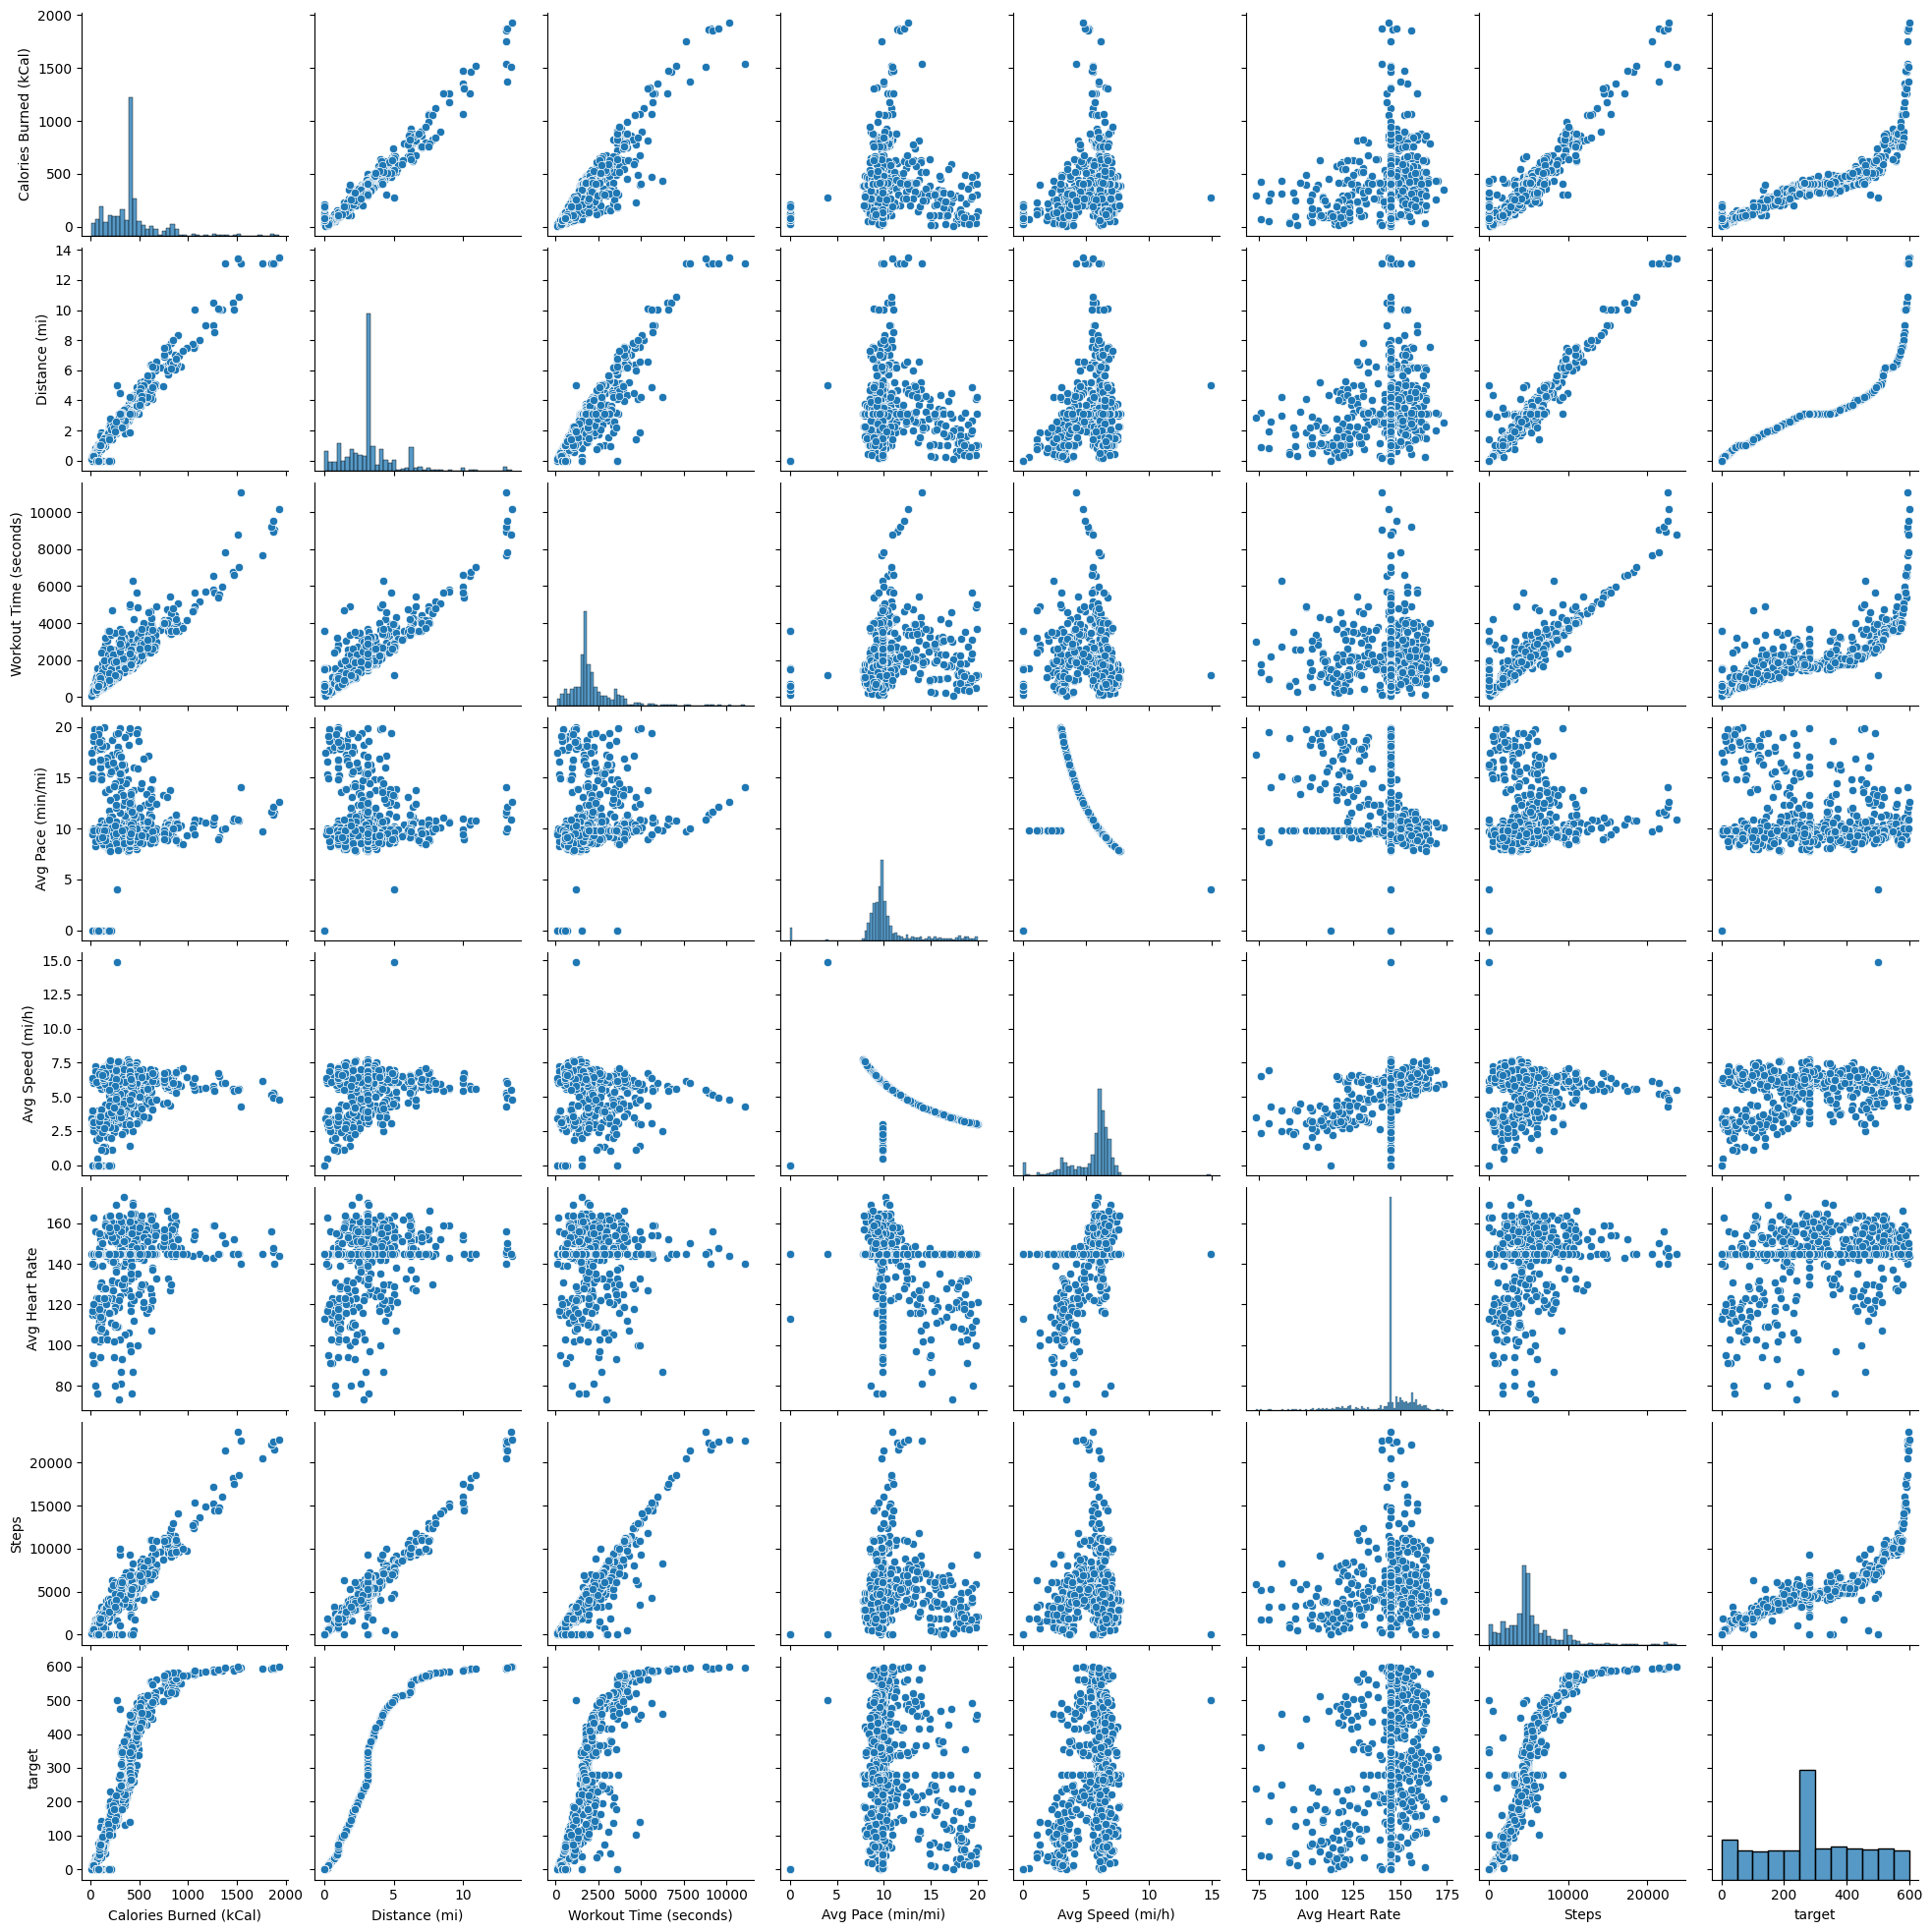

In [17]:
sns.pairplot(data)